<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject1/MiniProyecto_Miquel_Batalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Test inicial**

In [0]:
from google.colab import files
import io
uploaded = files.upload ()

Saving Part 2 IML test1.xlsx to Part 2 IML test1 (1).xlsx


In [0]:
import pandas as pd
df = pd.read_excel('Part 2 IML test1.xlsx', index_col=0, header=2)

In [0]:
df.head()

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31


In [0]:
import datetime
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10


In [0]:
df.loc[(df['Humans']>10) & (df['Robots']<30)]

,Humans,Robots
Date,,
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**TITANIC DATASET**


In [0]:
df1 = pd.read_csv('/content/gdrive/My Drive/Postgrau IML/Dades Machine Learning/titanic/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df1.shape

(891, 12)

In [0]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
N = df1.shape[0]
Nvius = df1.loc[df1['Survived']==1].shape[0]
Nmorts = df1.loc[df1['Survived']==0].shape[0]
print('Hi ha un total de {} passatgers, dels quals {} van sobreviure i {} van morir'.format(N,Nvius,Nmorts))

Hi ha un total de 891 passatgers, dels quals 342 van sobreviure i 549 van morir


In [0]:
df1_agrupats = df1.groupby(by=['Survived'])
df1_agrupats.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [0]:
df1_agrupats.std()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,260.640469,0.735805,14.172110,1.288399,0.823166,31.388207
1,252.358840,0.863321,14.950952,0.708688,0.771712,66.596998


In [0]:
df1.sort_values(by=['Age'],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [0]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

In [0]:
# 1a opció, eliminar elements sense edat
df1_ambedats = df1['Age'].dropna()
df1_ambedats.shape

(714,)

In [0]:
# 2a opció substituir elements sense edat per la mitja d'edat
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df1_fillmean.loc[df1_fillmean['Age'].isna()==True].shape[0]

0

In [0]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
df1_num=df1.select_dtypes(include='number')
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [0]:
df1_num.loc[df1_num['Age'].isna()==True].shape[0]

177

In [0]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.loc[df1_num['Age'].isna()==True]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6.0,0.0,3.0,30.5,0.0,0.0,8.4583
17,18.0,1.0,2.0,44.5,0.0,0.0,13.0000
19,20.0,1.0,3.0,14.5,0.0,0.0,7.2250
26,27.0,0.0,3.0,24.5,0.0,0.0,7.2250
28,29.0,1.0,3.0,40.5,0.0,0.0,7.8792
...,...,...,...,...,...,...,...
859,860.0,0.0,3.0,19.5,0.0,0.0,7.2292
863,864.0,0.0,3.0,39.0,8.0,2.0,69.5500
868,869.0,0.0,3.0,15.0,0.0,0.0,9.5000
878,879.0,0.0,3.0,19.5,0.0,0.0,7.8958


**Exercici 2**

In [0]:
df2 = pd.read_csv('/content/gdrive/My Drive/Postgrau IML/Dades Machine Learning/mpg_cars/auto-mpg.csv')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
df2.loc[df2['model year']==70].shape[0]

29

In [0]:
df2.loc[df2['model year']==70].mean()

mpg             1.768966e+01
cylinders       6.758621e+00
displacement    2.814138e+02
horsepower      4.488453e+74
weight          3.372793e+03
acceleration    1.294828e+01
model year      7.000000e+01
origin          1.310345e+00
dtype: float64

In [0]:
df2.groupby(by=['model year']).mean()

,mpg,cylinders,displacement,weight,acceleration,origin
model year,,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,2861.805556,15.805556,1.611111


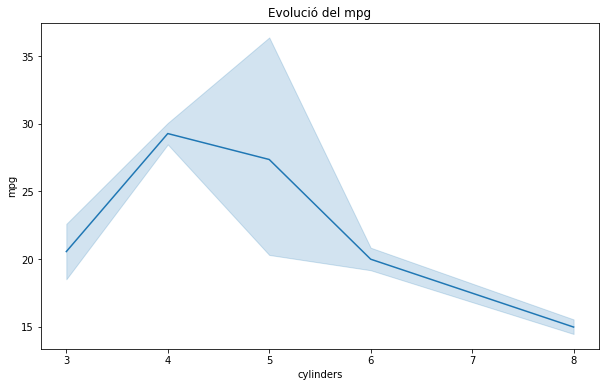

<Figure size 432x288 with 0 Axes>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="cylinders", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()
plt.savefig("Hola")

# Mini proyecto 1 - Suicide rates

In [0]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
sr = pd.read_csv('/content/gdrive/My Drive/Postgrau IML/Dades Machine Learning/MiniProjecte 1/MP1 - Suicide Rates.csv')
sr.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
sr.shape

(27820, 12)

In [0]:
sr.describe()
# Para "HDI for year" hay muchas filas vacias
# Los datos van de 1985 a 2016
# El maximo numero de suicidios registrados es 22338 (??)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [0]:
sr.loc[sr['suicides_no']==22338]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers


In [0]:
sr.groupby(by='country').mean().sort_values(by=('suicides_no'), ascending=False)
# El país con mas suicidios totales es Russia, seguido por Estados Unidos y Japón
# Tambien se observa que para Russia no hay disponible el HDI, aunque sí lo esta para el resto de paises que le siguen

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,NaN,6518.814815
United States,2000.000000,2779.604839,2.165061e+07,13.819812,0.891600,39269.612903
Japan,2000.000000,2169.091398,9.895228e+06,21.573199,0.861300,36397.548387
Ukraine,2000.571429,952.232143,3.828777e+06,26.582321,0.713500,1867.535714
Germany,2002.500000,933.532051,6.489986e+06,15.559904,0.881778,35164.230769
...,...,...,...,...,...,...
Grenada,2001.793548,0.122581,7.571890e+03,2.132258,0.741600,6209.406452
San Marino,2001.333333,0.111111,2.189583e+03,4.045000,NaN,53663.666667
Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185


In [0]:
sr_rus=sr.loc[sr['country']=="Russian Federation"]
sr_rus.loc[sr_rus['HDI for year'].isna()==False].shape[0]
# Comprovamos que para Russia no hay ningun valor de HDI disponible (se podria quizas imputar con el sklearn)

0

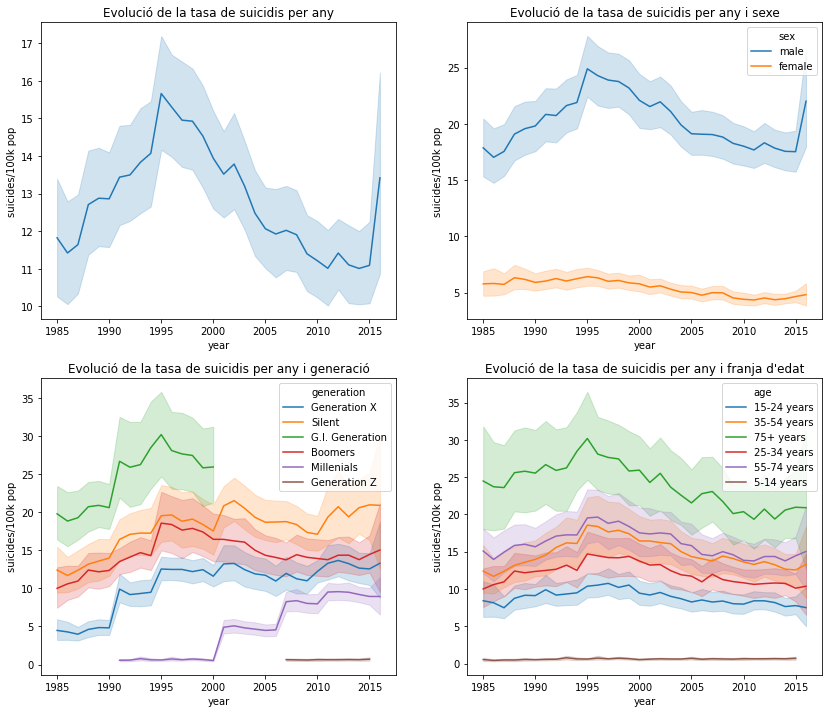

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="year", y="suicides/100k pop", data=sr)
ax.set_title('Evolució de la tasa de suicidis per any')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'sex', data=sr)
ax1.set_title('Evolució de la tasa de suicidis per any i sexe')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'generation', data=sr)
ax2.set_title('Evolució de la tasa de suicidis per any i generació')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'age', data=sr)
ax3.set_title("Evolució de la tasa de suicidis per any i franja d'edat")
plt.show()


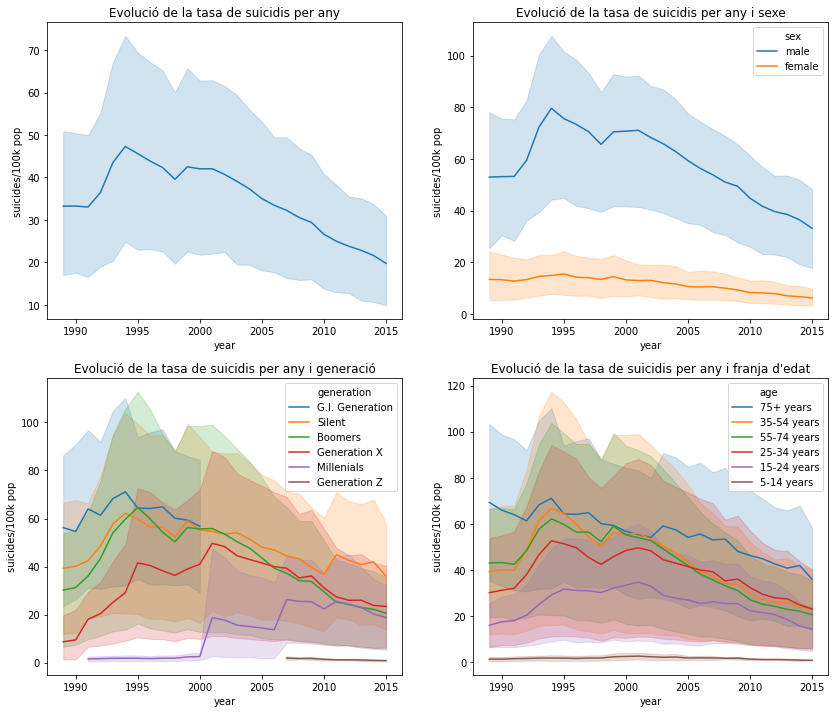

In [0]:
# Analisis només per Rússia
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="year", y="suicides/100k pop", data=sr_rus)
ax.set_title('Evolució de la tasa de suicidis per any')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'sex', data=sr_rus)
ax1.set_title('Evolució de la tasa de suicidis per any i sexe')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'generation', data=sr_rus)
ax2.set_title('Evolució de la tasa de suicidis per any i generació')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="year", y="suicides/100k pop", hue = 'age', data=sr_rus)
ax3.set_title("Evolució de la tasa de suicidis per any i franja d'edat")
plt.show()


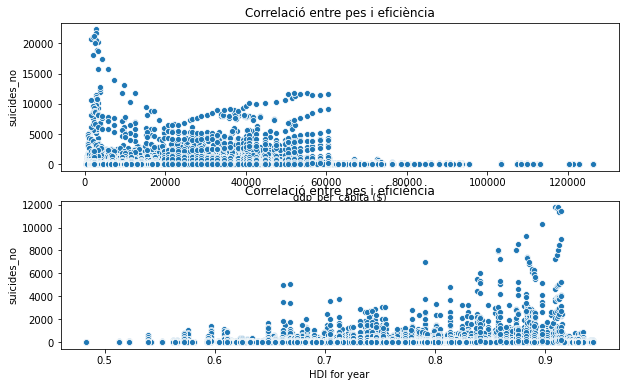

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(211)
ax = sns.scatterplot(x="gdp_per_capita ($)", y="suicides_no", data=sr)
ax.set_title('Correlació entre pes i eficiència')
ax1 = fig.add_subplot(212)
ax1 = sns.scatterplot(x="HDI for year", y="suicides_no", data=sr)
ax1.set_title('Correlació entre pes i eficiència')
plt.show()
# No s'observa una correlació clara entre aquestes variables

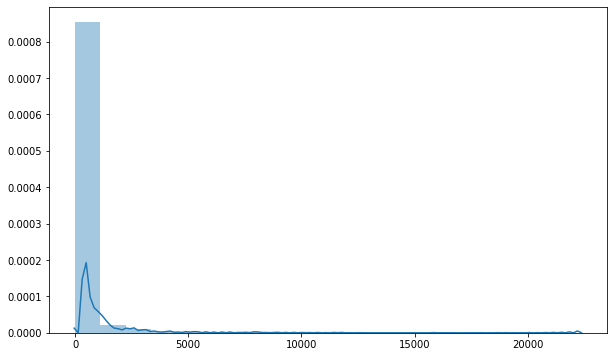

In [0]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(sr["suicides_no"].values,bins=20)

# Importar diferents csv a la vegada

In [0]:
# Importar diferents csv a la vegada

import pandas as pd
from google.colab import files
import os

root_folder = '/content/gdrive/My Drive/data_course'
for kfolder in os.listdir(root_folder):
    print('-------- Folder: {}'.format(kfolder))
    full_path = os.path.join(root_folder, kfolder)    
    for root, dirs, files in os.walk(full_path):
        for filename in files:
            print(filename)
            file_path = os.path.join(full_path, filename)  
            if (filename.endswith('.csv')):
                df = pd.read_csv(file_path, engine='python')
                print('csv contents data size {}'.format(df.shape))
            elif (filename.endswith('.xls')) | (filename.endswith('.xlsx')):
                print(filename)
                df = pd.read_csv(file_path, engine='python')
                print('excel contents data size {}'.format(df.shape))